In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df_all_data = pd.read_csv('F:\SERT_DREAD\Combined_binary_files_probe\csvs\\all_neurons_ts_with_clusters.csv')

In [3]:
def manipulate_df(df):
    df['spike'] = 1
    df['time'] = pd.to_timedelta(df['time'], unit='s')
    return df

def get_baseline_stats(df, condition_label, resample_period):
    df = df[df['condition'] == condition_label]
    df = create_ts(df=df,
                   rolling_period=False,
                   resample_period=resample_period)
    condition_means = df.transpose().mean(axis=1)
    condition_stds = df.transpose().std(axis=1)
    condition_sorted = condition_means.sort_values()
    return condition_means, condition_stds, condition_sorted

def create_ts(df, rolling_period, resample_period=1):
    df = df.pivot_table(index='time',
                        columns='spike_cluster',
                        values='spike',
                        aggfunc='count')
    df = df.resample('s').count()
    if rolling_period:
        df = df.rolling(rolling_period).mean()
    return df

def normalise(df, method, condition_means, condition_stds, condition_sorted):
    if method == 'zscore':
        def f(col):
            return (col.subtract(condition_means)).divide(condition_stds)
    elif method == 'percent':
        def f(col):
            return col.divide(condition_means) * 100
    elif not method:
        def f(col):
            print('Note: No Normalisation Method Provided')
            return col
    df = df.transpose().apply(f)
    return df.reindex(condition_sorted.index)

In [4]:
df_all_data.loc[:, 'recording'].unique()

array(['2018-04-10_391b', '2018-04-11_371a', '2018-04-12_371b',
       '2018-04-16_401b', '2018-04-17_401c', '2018-04-18_40.1a'],
      dtype=object)

In [5]:
df_rec = df_all_data[df_all_data['recording'] == '2018-04-11_371a'].copy()

df_rec = manipulate_df(df=df_rec)

In [6]:
df_rec.head()

,spike_cluster,time,condition,recording,category,spike
207805,63,00:00:00.018133,Baseline,2018-04-11_371a,slow irregular,1
207806,63,00:00:00.113733,Baseline,2018-04-11_371a,slow irregular,1
207807,63,00:00:00.153533,Baseline,2018-04-11_371a,slow irregular,1
207808,63,00:00:00.264533,Baseline,2018-04-11_371a,slow irregular,1
207809,63,00:00:00.324867,Baseline,2018-04-11_371a,slow irregular,1


In [7]:
base_means, base_stds, base_sorted = get_baseline_stats(df=df_rec,condition_label='Baseline', resample_period='120sec')

In [8]:
df_rec = create_ts(df=df_rec,resample_period='120sec', rolling_period=240)
df_rec = normalise(df=df_rec,method='zscore',condition_means=base_means,condition_stds=base_stds,condition_sorted=base_sorted)

In [9]:
df_sorted = df_rec.dropna(axis=1)

In [10]:
df_mean = pd.DataFrame({'Value':df_sorted.mean(axis=1)})
final_df=df_mean[df_mean['Value']>=0.5]

In [11]:
final_df['recording'] = '2018-04-11_371a'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
final_df['reaction']= 'reacted'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
final_df = final_df.reset_index()
final_df

,index,spike_cluster,Value,recording,reaction
0,0,9,2.291852,2018-04-11_371a,reacted
1,1,94,0.523814,2018-04-11_371a,reacted
2,2,55,0.912557,2018-04-11_371a,reacted
3,3,42,2.282649,2018-04-11_371a,reacted
4,4,80,0.506105,2018-04-11_371a,reacted
5,5,213,1.327350,2018-04-11_371a,reacted
6,6,212,0.527971,2018-04-11_371a,reacted
7,7,211,1.453514,2018-04-11_371a,reacted


In [14]:
df_stats_data = pd.read_csv('F:\SERT_DREAD\Combined_binary_files_probe\csvs\\neuron_stats.csv')

In [42]:
df_reaction = df_stats_data.merge(final_df, on=['spike_cluster', 'recording'], how='left')

In [48]:
df_reaction['reaction'].fillna(value = 'no reaction', inplace = True)

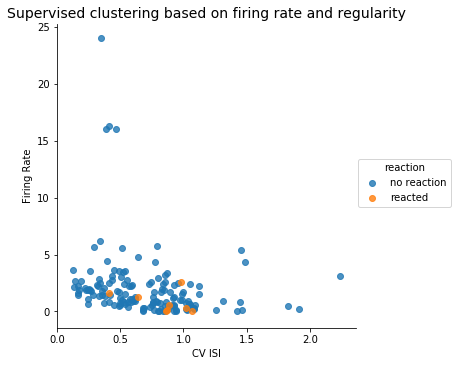

In [49]:
sns.lmplot(data=df_reaction, x='CV ISI', y='Firing Rate', fit_reg=False, hue='reaction')
plt.title('Supervised clustering based on firing rate and regularity', fontsize=14)
plt.show()

In [ ]:
def mean():
    return np.mean

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

Generate the data to play around with

In [ ]:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
data = np.concatenate((a, b),)
print(data.shape)  # 150 samples with 2 dimensions
plt.scatter(data[:,0], data[:,1])
plt.show()

Perform hierarchical clustering.

In [ ]:
clustered_data = linkage(data, 'ward')

Create the dendrogram

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    clustered_data,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

A fancy function for a fancy dendrogram

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
max_d = 17
plt.figure(figsize=(10, 10))
fancy_dendrogram(
    clustered_data,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

Generate the labels for scatter plot

In [ ]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(clustered_data, max_d, criterion='distance')

In [ ]:
df = pd.DataFrame(data)
#df['clustering'] = clusters
df['cluster']=clusters

In [ ]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df['cluster'])

Extract the first cluster for analysis

In [ ]:
first_cluster_df = df[df['cluster']==1].iloc[:,:2]
plt.scatter(first_cluster_df[0], first_cluster_df[1])
plt.ylim(-5, 25)
plt.xlim(-4, 20)
plt.show()

Perform PCA on the first cluster

In [ ]:
from sklearn.decomposition import PCA
model = PCA(n_components = 2)
model.fit(first_cluster_df)
pca = model.transform(first_cluster_df)

Illustrate the PCA transformation on the first cluster

In [ ]:
mean = model.mean_
first_component = model.components_[0]
second_component = model.components_[1]
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df['cluster'])
plt.arrow(mean[0], mean[1], first_component[0], first_component[1], color = 'red', width = 0.2)
plt.arrow(mean[0], mean[1], second_component[0], second_component[1], color = 'red', width =0.2)
plt.show()

# BREAST CANCER DATA 

import breast cancer data from sklean datasets

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
cancer_df.head()

Scale data for analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_data = scale.fit_transform(cancer_df)
#pd.DataFrame(scaled_data, columns=cancer['feature_names'])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transformed_cancer_data = pca.fit_transform(scaled_data)
plt.scatter(transformed_cancer_data[:,0], transformed_cancer_data[:,1], c=cancer['target'])
print(transformed_cancer_data.shape)

Extract one cluster 

In [ ]:
transformed_df = pd.DataFrame(transformed_cancer_data)
transformed_df['cluster']=cancer['target']
first_cancer_cluster = transformed_df[transformed_df['cluster']==0].iloc[:,:2]
plt.scatter(first_cancer_cluster[0], first_cancer_cluster[1])

In [ ]:
components_table = pd.DataFrame(pca.components_, columns = cancer['feature_names'])
components_table.head()



In [ ]:
pca.components_

In [ ]:
sns.heatmap(components_table, cmap = 'coolwarm')


# CSV file analysis


In [ ]:
df = pd.read_csv('/Users/sharplab/tran/neuron_stats.csv')
df.head()

### Only take the non null clusters

In [ ]:
df = df[pd.notnull(df['SW_troff'])]
df.head()

In [ ]:
recordings = df['recording'].unique()
recordings

### Separate the recordings

In [ ]:
df.groupby('recording')['Firing Rate'].plot(kind='hist', density = True, alpha=0.6)
plt.show()

In [ ]:
for a, b in enumerate(recordings):
    print(a)
    print(b)
    print()

In [ ]:
sns.swarmplot(data=df, x='recording', y='Firing Rate')
plt.tight_layout()


In [ ]:
sns.swarmplot(data=df, x='recording', y='CV ISI')
plt.tight_layout()

In [ ]:
sns.jointplot(data=df, x='Firing Rate', y='CV ISI')

In [ ]:
sns.set()
sns.lmplot(data=df, x='CV ISI', y='Firing Rate', fit_reg=False, hue='recording')


In [ ]:
F, a = plt.subplots(ncols=1, nrows=6, figsize=(10,20))
df['recording'].unique()
for index, recording in enumerate(recordings):
    temp_df= df[df['recording']==recording]
    a[index].hist(temp_df['Firing Rate'], density=True, bins=len(temp_df))
    a[index].set_xlim([0, 25])
    plt.savefig(sep.join(fig_to_save))
    plt.close()
    
plt.tight_layout()
plt.show()

In [ ]:

def separate_recording(df):
    gb = df.groupby('recording')    
    [gb.get_group(record) for record in gb.groups]

In [ ]:
separate_recording(df)

In [ ]:
df1 = df[df['recording']=='2018-04-10_391b']
df1.shape

In [ ]:
df2 = df[df['recording']=='2018-04-11_371a']
df2.shape

In [ ]:
plt.hist(df2['Firing Rate'], bins=len(df2), density=True)
plt.show()

In [ ]:
data = pd.concat([df['CV ISI'], df['Firing Rate'], df['SW_return'], df['SW_troff'], df['base_min_amp']], axis=1)

In [ ]:
data.head()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_data = scale.fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(scaled_data)
plt.scatter(transformed_data[:,0], transformed_data[:,1])


In [ ]:
from sklearn.cluster import KMeans
ks = range(1, 12)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(transformed_data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
new_model = KMeans(n_clusters=4)
labels = new_model.fit_predict(transformed_data)
plt.scatter(transformed_data[:,0], transformed_data[:,1], c=labels)

In [ ]:
components_table = pd.DataFrame(pca.components_, columns = data.keys())

In [ ]:
sns.heatmap(components_table, cmap = 'coolwarm')

In [ ]:
clustered_data = linkage(scaled_data, 'ward')

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    clustered_data,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:

def mapper(row):
    if row['CV ISI'] <= 0.55:
        reg = 'regulular'
    else:
        reg = 'irregular'
        
    if row['Firing Rate'] <= 4.5:
        rate = 'slow'
    else:
        rate = 'fast'
        
    return ' '.join([rate, reg])

In [ ]:
df['category'] = df.apply(mapper, axis=1)

In [ ]:
df.groupby('category').describe()

In [ ]:
df_slow_irregular = df[df['category']== 'slow irregular']


In [ ]:
sns.set()
sns.lmplot(data=df_slow_irregular, x='SW_return', y='base_min_amp', fit_reg=False, hue='recording')